# Portfolio Optimization Workshop Challenge

Practical challenges and exercises for participants of the Portfolio Optimization Workshop

> Disclaimer:
This notebook is for educational purposes only and does not constitute financial advice. Always conduct your own research and consult with a professional before making any investment decisions.
Disclaimer: This

## Data Collection from Sectors API

### Using Github Codespaces as Environments

In [1]:
import os

# get SECTORS_API_KEY from environment variables
# Retrieve the API key securely
api_key = os.getenv('SECTORS_API_KEY')

### Stock Price Information

#### Retrive Stock index from "Companies by Index" API

In [4]:
# Retrive Stock index from "Companies by Index" API

import time
import requests
# from google.colab import userdata

# Define the API URL
# Available index: ftse, idx30, idxbumn20, idxesgl, idxg30, idxhidiv20, idxq30, idxv30, jii70, kompas100, lq45, sminfra18, srikehati, economic30
url = "https://api.sectors.app/v1/index/idxhidiv20/"

# Pass the API key in the header
headers = {"Authorization": api_key}

# Make the API request
response_company_index = requests.get(url, headers=headers)

print(response_company_index.text)

[{"symbol":"ADRO.JK","company_name":"Adaro Energy Indonesia Tbk"},{"symbol":"AMRT.JK","company_name":"PT Sumber Alfaria Trijaya Tbk."},{"symbol":"ANTM.JK","company_name":"Aneka Tambang Tbk."},{"symbol":"ASII.JK","company_name":"Astra International Tbk"},{"symbol":"BBCA.JK","company_name":"PT Bank Central Asia Tbk."},{"symbol":"BBNI.JK","company_name":"PT Bank Negara Indonesia (Persero) Tbk"},{"symbol":"BBRI.JK","company_name":"PT Bank Rakyat Indonesia (Persero) Tbk"},{"symbol":"BMRI.JK","company_name":"PT Bank Mandiri (Persero) Tbk"},{"symbol":"BRPT.JK","company_name":"Barito Pacific Tbk"},{"symbol":"ICBP.JK","company_name":"Indofood CBP Sukses Makmur Tbk"},{"symbol":"INDF.JK","company_name":"Indofood Sukses Makmur Tbk"},{"symbol":"INKP.JK","company_name":"Indah Kiat Pulp & Paper Tbk"},{"symbol":"ITMG.JK","company_name":"Indo Tambangraya Megah Tbk"},{"symbol":"KLBF.JK","company_name":"Kalbe Farma Tbk"},{"symbol":"PTBA.JK","company_name":"Bukit Asam Tbk"},{"symbol":"SMGR.JK","company_na

In [5]:
import pandas as pd
# Convert the response to a DataFrame
df_company_index = pd.DataFrame(response_company_index.json())
df_company_index

,symbol,company_name
0,ADRO.JK,Adaro Energy Indonesia Tbk
1,AMRT.JK,PT Sumber Alfaria Trijaya Tbk.
2,ANTM.JK,Aneka Tambang Tbk.
3,ASII.JK,Astra International Tbk
4,BBCA.JK,PT Bank Central Asia Tbk.
5,BBNI.JK,PT Bank Negara Indonesia (Persero) Tbk
6,BBRI.JK,PT Bank Rakyat Indonesia (Persero) Tbk
7,BMRI.JK,PT Bank Mandiri (Persero) Tbk
8,BRPT.JK,Barito Pacific Tbk
9,ICBP.JK,Indofood CBP Sukses Makmur Tbk


#### Retrieve date and price from "Daily Transaction Data" API

In [6]:
# Retrieve date and price from "Daily Transaction Data" API

from datetime import datetime, timedelta

# Function to calculate the date 90 days ago from today
def calculate_start_date(days_ago=90):
    return (datetime.now() - timedelta(days=days_ago)).strftime('%Y-%m-%d')

# Calculate the start date 90 days ago
start_date = calculate_start_date()

# Looping API info
history_idxhidiv20 = []

for i, x in enumerate(response_company_index.json()):

  # Define the URL for the API endpoint
  url = "https://api.sectors.app/v1/daily/" + response_company_index.json()[i]['symbol'] + "/"

  # Define the query string with the calculated start date
  querystring = {"start": start_date}

  headers = {"Authorization": api_key}

  response_daily_transaction_data = requests.request("GET", url, headers=headers, params=querystring)

  # Append the result into target list
  # history_sminfra18.append(response_daily_transaction_data.json())
  history_idxhidiv20.append(response_daily_transaction_data.json())

  time.sleep(1)

In [7]:
history_idxhidiv20

[[{'symbol': 'ADRO.JK',
   'date': '2024-08-29',
   'close': 3520,
   'volume': 63218700,
   'market_cap': 108270622605312},
  {'symbol': 'ADRO.JK',
   'date': '2024-08-30',
   'close': 3560,
   'volume': 95767700,
   'market_cap': 109500971352064},
  {'symbol': 'ADRO.JK',
   'date': '2024-09-02',
   'close': 3610,
   'volume': 96348100,
   'market_cap': 111038905188352},
  {'symbol': 'ADRO.JK',
   'date': '2024-09-03',
   'close': 3600,
   'volume': 291300,
   'market_cap': 110731320098816},
  {'symbol': 'ADRO.JK',
   'date': '2024-09-04',
   'close': 3560,
   'volume': 746300,
   'market_cap': 109500971352064},
  {'symbol': 'ADRO.JK',
   'date': '2024-09-05',
   'close': 3550,
   'volume': 64913100,
   'market_cap': 110420262125568},
  {'symbol': 'ADRO.JK',
   'date': '2024-09-06',
   'close': 3470,
   'volume': 45222100,
   'market_cap': 107931915780096},
  {'symbol': 'ADRO.JK',
   'date': '2024-09-09',
   'close': 3490,
   'volume': 82176000,
   'market_cap': 107347858948096},
  {'

## Company Report Information

In [8]:
company_report_idxhidiv20 = []

for i, x in enumerate(response_company_index.json()):

  #Define the URL for the API endpoint
  url = "https://api.sectors.app/v1/company/report/" +  response_company_index.json()[i]['symbol'] + "/"

  headers = {"Authorization": api_key}

  #Make the API request
  response_company_report = requests.request("GET", url, headers=headers)

  # Append the result into target list
  company_report_idxhidiv20.append(response_company_report.json())

  time.sleep(1)

In [10]:
company_report_idxhidiv20

[{'symbol': 'ADRO.JK',
  'company_name': 'Adaro Energy Indonesia Tbk',
  'overview': {'listing_board': 'Main',
   'industry': 'Coal',
   'sub_industry': 'Coal Production',
   'sector': 'Energy',
   'sub_sector': 'Oil, Gas & Coal',
   'market_cap': 112884424114176,
   'market_cap_rank': 17,
   'address': 'Menara Karya 23rd Floor Jl. H.R. Rasuna Said, Block X-5, Kav. 1-2 Jakarta 12950',
   'employee_num': 13042,
   'listing_date': '2008-07-16',
   'website': 'www.adaro.com',
   'phone': '021-25533000',
   'email': 'mahardika.putranto@adaro.com ; aditya.sudjono@adaro.com',
   'last_close_price': 3670,
   'latest_close_date': '2024-11-26',
   'daily_close_change': -0.026525198938992},
  'valuation': {'last_close_price': 3670,
   'latest_close_date': '2024-11-26',
   'daily_close_change': -0.026525198938992,
   'forward_pe': 7.10744462025129,
   'price_cash_flow': 3.7713295400860107,
   'enterprise_to_revenue': 0.9049589188630374,
   'enterprise_to_ebitda': 2.369462528844855,
   'peg_ratio'

In [11]:
# Create a subset to retrieve relative information for analysis
prepared_data = []

# Looping through companies in the index
for company in company_report_idxhidiv20:
  current_company = {}

# Accessing relative API information
  current_company['symbol'] = company['symbol']
  current_company['company_name'] = company['company_name']
  current_company['industry'] = company['overview']['industry']
  current_company['sub_industry'] = company['overview']['sub_industry']
  current_company['sector'] = company['overview']['sector']

# For the forecast variables ("company_growth_forecasts" and "company_value_forecasts"), we can see that they have both year 2024 and 2025 forecast

# Create a function to only capture year 2025 value
  if company['future']['company_value_forecasts'] != None:
    for i, forecast in enumerate(company['future']['company_value_forecasts']):
      if forecast['estimate_year'] == 2025:
        position = i

# This code below, we can see that estimate_year has both 2024 and 2025, we only want forecast variables based on year 2025
# We also observe that the year is the same for 'company_value_forecast' and 'company_growth_forecasts'
# Meaning we just create 1 function to use one variable is enough to capture all the year to 2025 for forecasting variables
    #print(company['future']['company_value_forecasts'][0]['estimate_year'])
    #print(company['future']['company_growth_forecasts'][0]['estimate_year'])
    #print('next')


# Exception handling in case the value is empty to double secure the result

  try:
    current_company['eps_estimate'] = company['future']['company_value_forecasts'][position]['eps_estimate']
  except:
    current_company['eps_estimate'] = 0

  try:
    current_company['revenue_estimate'] = company['future']['company_value_forecasts'][position]['revenue_estimate']
  except:
    current_company['revenue_estimate'] = 0

  try:
    current_company['eps_growth'] = company['future']['company_growth_forecasts'][position]['eps_growth']
  except:
    current_company['eps_growth'] = 0

  try:
    current_company['revenue_growth'] = company['future']['company_growth_forecasts'][position]['revenue_growth']
  except:
    current_company['revenue_growth'] = 0

  try:
    current_company['total_dividends'] = company['dividend']['annual_yield'][0]['total']
  except:
    current_company['total_dividends'] = 0

  try:
    current_company['avg_yield_dividends'] = company['dividend']['dividend_yield_avg']['avg_yield']
  except:
    current_company['avg_yield_dividends'] = 0

  prepared_data.append(current_company)

prepared_data

[{'symbol': 'ADRO.JK',
  'company_name': 'Adaro Energy Indonesia Tbk',
  'industry': 'Coal',
  'sub_industry': 'Coal Production',
  'sector': 'Energy',
  'eps_estimate': 586.45,
  'revenue_estimate': 87060000000000,
  'eps_growth': -0.286889485593089,
  'revenue_growth': -0.137654095003618,
  'total_dividends': 209.31,
  'avg_yield_dividends': 0.119638402014971},
 {'symbol': 'AMRT.JK',
  'company_name': 'PT Sumber Alfaria Trijaya Tbk.',
  'industry': 'Food & Staples Retailing',
  'sub_industry': 'Supermarkets & Convenience Store',
  'sector': 'Consumer Non-Cyclicals',
  'eps_estimate': 114.04,
  'revenue_estimate': 130120000000000,
  'eps_growth': None,
  'revenue_growth': 0.216703779466998,
  'total_dividends': 28.68,
  'avg_yield_dividends': 0.010955600393936},
 {'symbol': 'ANTM.JK',
  'company_name': 'Aneka Tambang Tbk.',
  'industry': 'Metals & Minerals',
  'sub_industry': 'Diversified Metals & Minerals',
  'sector': 'Basic Materials',
  'eps_estimate': 131.26,
  'revenue_estimate'

## Which Stock to choose?

### Data Preprocessing

**How to select stocks**?

For our client Indra, who’s focused on stocks from the IDXHiDiv20 index and doesn't want to invest in the ente it’s time to carefully select the right stocks.

Several key economic factors should guide stock selection from an index:

* Diversification by Industry and Sector: Ensuring exposure across different sectors to reduce risk.
* Diversification by Correlation and Returns: Selecting stocks that offer varied returns and are not too closely correlated.
* Company Growth and Dividend Information: Choosing companies with strong growth potential and reliable dividend payouts.

Other factors, like recent projects, mergers, acquisitions, and broader macroeconomic or geopolitical policies, are also worth considering, though we won’t delve into them here.

In this section, we will employ a range of data analysis techniques, along with our expertise in stock selection, to identify four suitable stocks from a pool of 20 for our client, Siti, to invest in.


#### Step 1: Create a Dataframe for historical stock performance

> **To save API usage, required dataframe saved to CSV. For further analysis load saved CSV.**

In [12]:
# Import all useful libraries
import numpy as np
import pandas as pd

In [13]:
# Flatten the list of lists into a single list of dictionaries
flattened_data = [item for sublist in history_idxhidiv20 for item in sublist]

# Convert to a pandas DataFrame
df_history_idxhidiv20 = pd.DataFrame(flattened_data)

# Ensure 'date' is in datetime format
df_history_idxhidiv20['date'] = pd.to_datetime(df_history_idxhidiv20['date'])

# Enforce in case any column needs conversion (e.g., 'close', 'volume', 'market_cap')
df_history_idxhidiv20['close'] = pd.to_numeric(df_history_idxhidiv20['close'], errors='coerce')
df_history_idxhidiv20['volume'] = pd.to_numeric(df_history_idxhidiv20['volume'], errors='coerce')
df_history_idxhidiv20['market_cap'] = pd.to_numeric(df_history_idxhidiv20['market_cap'], errors='coerce')

# Check for the first few rows to ensure everything is correct
print(df_history_idxhidiv20)

      symbol       date  close    volume       market_cap
0    ADRO.JK 2024-08-29   3520  63218700  108270622605312
1    ADRO.JK 2024-08-30   3560  95767700  109500971352064
2    ADRO.JK 2024-09-02   3610  96348100  111038905188352
3    ADRO.JK 2024-09-03   3600    291300  110731320098816
4    ADRO.JK 2024-09-04   3560    746300  109500971352064
..       ...        ...    ...       ...              ...
415  UNVR.JK 2024-09-23   2210  17520500   84311499866112
416  UNVR.JK 2024-09-24   2260  25946800   86219002216448
417  UNVR.JK 2024-09-25   2300  36252700   87744999063552
418  UNVR.JK 2024-09-26   2300  24682000   87744999063552
419  UNVR.JK 2024-09-27   2270  38117300   86600499331072

[420 rows x 5 columns]


In [ ]:
# save the data to a CSV file
df_history_idxhidiv20.to_csv('df_history_idxhidiv20.csv', index=False)

In [14]:
# We aim to have all the stock price evolution in the past 90 days in one dataframe

#Pivot the DataFrame so that the 'symbol' becomes the column names and 'date' becomes the index
df_pivot_history_idxhidiv20 = df_history_idxhidiv20.pivot_table(index='date', columns='symbol', values='close')
df_pivot_history_idxhidiv20.head()

symbol,ADRO.JK,AMRT.JK,ANTM.JK,ASII.JK,BBCA.JK,BBNI.JK,BBRI.JK,BMRI.JK,BRPT.JK,ICBP.JK,INDF.JK,INKP.JK,ITMG.JK,KLBF.JK,PTBA.JK,SMGR.JK,TLKM.JK,TPIA.JK,UNTR.JK,UNVR.JK
date,,,,,,,,,,,,,,,,,,,,
2024-08-29,3520.0,2850.0,1410.0,5075.0,10225.0,5300.0,5125.0,7100.0,1140.0,11400.0,6800.0,8350.0,27175.0,1700.0,2780.0,4020.0,3030.0,9400.0,27325.0,2240.0
2024-08-30,3560.0,2900.0,1390.0,5100.0,10325.0,5350.0,5150.0,7125.0,1145.0,11475.0,6850.0,8100.0,27225.0,1650.0,2730.0,4010.0,3060.0,9975.0,27050.0,2270.0
2024-09-02,3610.0,2890.0,1395.0,5200.0,10275.0,5350.0,5175.0,7200.0,1120.0,11500.0,6725.0,8100.0,27675.0,1680.0,2820.0,4090.0,3140.0,9600.0,27900.0,2290.0
2024-09-03,3600.0,2870.0,1370.0,5125.0,10175.0,5375.0,5175.0,7075.0,1105.0,11375.0,6775.0,8100.0,27800.0,1680.0,2800.0,4030.0,3080.0,9450.0,27775.0,2250.0
2024-09-04,3560.0,2900.0,1345.0,5050.0,10300.0,5350.0,5100.0,7175.0,1110.0,11400.0,6700.0,8125.0,27500.0,1730.0,2760.0,3980.0,3080.0,9525.0,27650.0,2240.0


In [ ]:
# save the data to a CSV file
df_pivot_history_idxhidiv20.to_csv('df_pivot_history_idxhidiv20.csv')

#### Step 2: Create a Dataframe for company report

In [ ]:
df_idxhidiv20_company_report = pd.DataFrame(prepared_data)
df_idxhidiv20_company_report

,symbol,company_name,industry,sub_industry,sector,eps_estimate,revenue_estimate,eps_growth,revenue_growth,total_dividends,avg_yield_dividends
0,ADRO.JK,Adaro Energy Indonesia Tbk,Coal,Coal Production,Energy,586.45,87060000000000,-0.286889,-0.137654,209.3100,0.119638
1,AMRT.JK,PT Sumber Alfaria Trijaya Tbk.,Food & Staples Retailing,Supermarkets & Convenience Store,Consumer Non-Cyclicals,114.04,130120000000000,NaN,0.216704,28.6800,0.010956
2,ANTM.JK,Aneka Tambang Tbk.,Metals & Minerals,Diversified Metals & Minerals,Basic Materials,131.26,54340000000000,0.024900,0.323826,128.0710,0.016804
3,ASII.JK,Astra International Tbk,Multi-sector Holdings,Multi-sector Holdings,Industrials,766.51,321160000000000,-0.082970,0.014515,519.0000,0.047720
4,BBCA.JK,PT Bank Central Asia Tbk.,Banks,Banks,Financials,481.71,118230000000000,0.220886,0.160088,277.5000,0.018048
5,BBNI.JK,PT Bank Negara Indonesia (Persero) Tbk,Banks,Banks,Financials,675.27,70890000000000,0.203206,0.151119,280.4950,0.051717
6,BBRI.JK,PT Bank Rakyat Indonesia (Persero) Tbk,Banks,Banks,Financials,443.55,214380000000000,0.113784,0.287753,319.0000,0.037705
7,BMRI.JK,PT Bank Mandiri (Persero) Tbk,Banks,Banks,Financials,673.50,163850000000000,0.141662,0.329568,353.9580,0.043529
8,BRPT.JK,Barito Pacific Tbk,Chemicals,Basic Chemicals,Basic Materials,20.53,44180000000000,3.748193,0.033256,0.8730,0.001625
9,ICBP.JK,Indofood CBP Sukses Makmur Tbk,Processed Foods,Processed Foods,Consumer Non-Cyclicals,908.29,78010000000000,0.515240,0.148728,200.0000,0.020192


In [ ]:
# save the data to a CSV file
df_idxhidiv20_company_report.to_csv('df_idxhidiv20_company_report.csv', index=False)

### Exploratory Data Analysis (EDA)

Our goal is to select four stocks from a list of 20 for Siti to invest in.

At the beginning of this section, we outlined three strategies:

* Diversification by Industry and Sector: Conduct an overview analysis to understand the information better.
* Diversification by Correlation: Examine the correlation matrix based on stock price evolution.
* Company Growth and Dividend Information: Extract all relevant information beyond sector and industry, normalize the data, and assign a score to each stock.

#### Load saved CSV

In [135]:
# load the data from the CSV file
import pandas as pd

df_idxhidiv20_company_report = pd.read_csv('df_idxhidiv20_company_report.csv')
df_history_idxhidiv20 = pd.read_csv('df_history_idxhidiv20.csv')
df_pivot_history_idxhidiv20 = pd.read_csv('df_pivot_history_idxhidiv20.csv', parse_dates=['date'], index_col='date')

#### Overview of Sectors and Industries

In [61]:
# Categorize stocks by industries
df_idxhidiv20_company_report.industry.value_counts()

industry
Banks                        4
Coal                         3
Chemicals                    2
Processed Foods              2
Food & Staples Retailing     1
Multi-sector Holdings        1
Metals & Minerals            1
Forestry & Paper             1
Pharmaceuticals              1
Construction Materials       1
Telecommunication Service    1
Machinery                    1
Personal Care Products       1
Name: count, dtype: int64

In [62]:
# Categorize stocks by sectors
df_idxhidiv20_company_report.sector.value_counts()

sector
Basic Materials           5
Consumer Non-Cyclicals    4
Financials                4
Energy                    3
Industrials               2
Healthcare                1
Infrastructures           1
Name: count, dtype: int64

#### Correlation Matrix on stock price evolution

In [63]:
# Calculate the correlation of the 18 stock prices
correlation_matrix = df_pivot_history_idxhidiv20.corr()
correlation_matrix

,ADRO.JK,AMRT.JK,ANTM.JK,ASII.JK,BBCA.JK,BBNI.JK,BBRI.JK,BMRI.JK,BRPT.JK,ICBP.JK,INDF.JK,INKP.JK,ITMG.JK,KLBF.JK,PTBA.JK,SMGR.JK,TLKM.JK,TPIA.JK,UNTR.JK,UNVR.JK
ADRO.JK,1.000000,0.743180,0.620218,0.388895,0.603205,0.169363,0.167744,0.120522,-0.005783,0.586285,0.630329,0.355704,-0.402672,0.342656,0.667712,-0.655619,0.453183,-0.533193,-0.017999,0.227101
AMRT.JK,0.743180,1.000000,0.363041,0.483917,0.831057,0.654451,0.505547,0.533354,0.074032,0.676364,0.886558,0.626944,-0.708085,0.680583,0.627937,-0.868478,0.593307,-0.738553,-0.355891,0.035079
ANTM.JK,0.620218,0.363041,1.000000,0.563300,0.480674,-0.210109,0.037404,-0.288273,-0.167865,0.713908,0.259395,0.205054,0.028188,0.042481,0.833242,-0.498776,0.494822,-0.177083,0.517105,0.684371
ASII.JK,0.388895,0.483917,0.563300,1.000000,0.748008,0.352688,0.570405,0.313032,-0.047742,0.563995,0.347821,0.019892,-0.210888,0.234382,0.668547,-0.588645,0.882626,-0.457305,0.207335,0.310810
BBCA.JK,0.603205,0.831057,0.480674,0.748008,1.000000,0.670047,0.678001,0.539377,-0.018231,0.703895,0.741317,0.397816,-0.643733,0.578245,0.720368,-0.915307,0.765377,-0.744941,-0.176470,0.019266
BBNI.JK,0.169363,0.654451,-0.210109,0.352688,0.670047,1.000000,0.741932,0.821105,0.009552,0.277213,0.706678,0.415213,-0.698397,0.648779,0.172447,-0.603702,0.374385,-0.685079,-0.551674,-0.514946
BBRI.JK,0.167744,0.505547,0.037404,0.570405,0.678001,0.741932,1.000000,0.773333,-0.006312,0.169677,0.436731,0.077473,-0.470933,0.328279,0.306924,-0.594407,0.576846,-0.642244,-0.276105,-0.332045
BMRI.JK,0.120522,0.533354,-0.288273,0.313032,0.539377,0.821105,0.773333,1.000000,0.293751,-0.023110,0.440389,0.101758,-0.644796,0.438072,0.004504,-0.437304,0.368011,-0.568304,-0.609135,-0.565822
BRPT.JK,-0.005783,0.074032,-0.167865,-0.047742,-0.018231,0.009552,-0.006312,0.293751,1.000000,-0.369715,-0.073430,-0.010940,-0.265348,-0.110344,-0.419514,0.072153,-0.091462,0.129998,-0.552145,-0.136873
ICBP.JK,0.586285,0.676364,0.713908,0.563995,0.703895,0.277213,0.169677,-0.023110,-0.369715,1.000000,0.635777,0.541670,-0.218458,0.481158,0.910894,-0.748063,0.546540,-0.463217,0.307728,0.479009


### Normalization & Scoring

We will extract all relevant columns (excluding those related to sectors and industries) from the `df_idxhidiv20_company_report` to evaluate the growth potential and dividend information for the 20 companies. Based on this analysis, we will assign scores to each company to identify the top candidates. Subsequently, we will validate our selections through diversification considerations concerning industry and sector, as well as correlation analysis.

#### Extract useful information for normalization analysis

In [64]:
# Import library for normalization
from sklearn.preprocessing import MinMaxScaler

In [65]:
# Extract useful information for normalization analysis
columns_of_interest = ['symbol', 'eps_growth', 'avg_yield_dividends', 'revenue_growth', 'revenue_estimate']
df_idxhidiv20_company_report_norm = df_idxhidiv20_company_report[columns_of_interest]
df_idxhidiv20_company_report_norm

,symbol,eps_growth,avg_yield_dividends,revenue_growth,revenue_estimate
0,ADRO.JK,-0.286889,0.119638,-0.137654,87060000000000
1,AMRT.JK,NaN,0.010956,0.216704,130120000000000
2,ANTM.JK,0.024900,0.016804,0.323826,54340000000000
3,ASII.JK,-0.082970,0.047720,0.014515,321160000000000
4,BBCA.JK,0.220886,0.018048,0.160088,118230000000000
5,BBNI.JK,0.203206,0.051717,0.151119,70890000000000
6,BBRI.JK,0.113784,0.037705,0.287753,214380000000000
7,BMRI.JK,0.141662,0.043529,0.329568,163850000000000
8,BRPT.JK,3.748193,0.001625,0.033256,44180000000000
9,ICBP.JK,0.515240,0.020192,0.148728,78010000000000


#### Check missing data and handle it

In [66]:
# Check missing data
df_idxhidiv20_company_report_norm.isnull().sum()

symbol                 0
eps_growth             1
avg_yield_dividends    0
revenue_growth         0
revenue_estimate       0
dtype: int64

In [70]:
# Impute missing data with mean - we do a simple imputation here, can also check the reason and correlation with other variables behind missing data
df_idxhidiv20_company_report_norm.fillna(df_idxhidiv20_company_report_norm.eps_growth.min(), inplace=True)
df_idxhidiv20_company_report_norm.isnull().sum()

/tmp/ipykernel_63782/866821648.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_idxhidiv20_company_report_norm.fillna(df_idxhidiv20_company_report_norm.eps_growth.min(), inplace=True)


symbol                 0
eps_growth             0
avg_yield_dividends    0
revenue_growth         0
revenue_estimate       0
dtype: int64

In [71]:
df_idxhidiv20_company_report_norm

,symbol,eps_growth,avg_yield_dividends,revenue_growth,revenue_estimate
0,ADRO.JK,0.003285,0.692736,0.000000,0.271080
1,AMRT.JK,0.000000,0.054772,0.758436,0.405156
2,ANTM.JK,0.080301,0.089099,0.987710,0.169199
3,ASII.JK,0.053656,0.270577,0.325689,1.000000
4,BBCA.JK,0.128712,0.096403,0.637261,0.368134
5,BBNI.JK,0.124345,0.294038,0.618065,0.220731
6,BBRI.JK,0.102256,0.211791,0.910504,0.667518
7,BMRI.JK,0.109143,0.245976,1.000000,0.510182
8,BRPT.JK,1.000000,0.000000,0.365800,0.137564
9,ICBP.JK,0.201421,0.108987,0.612946,0.242901


In [72]:
# Normalize the data for the metrics using MinMaxScaler
scaler = MinMaxScaler()
df_idxhidiv20_company_report_norm[['eps_growth', 'avg_yield_dividends', 'revenue_growth', 'revenue_estimate']] = scaler.fit_transform(df_idxhidiv20_company_report_norm[['eps_growth', 'avg_yield_dividends', 'revenue_growth', 'revenue_estimate']])

/tmp/ipykernel_63782/3202589721.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_idxhidiv20_company_report_norm[['eps_growth', 'avg_yield_dividends', 'revenue_growth', 'revenue_estimate']] = scaler.fit_transform(df_idxhidiv20_company_report_norm[['eps_growth', 'avg_yield_dividends', 'revenue_growth', 'revenue_estimate']])


In [73]:
df_idxhidiv20_company_report_norm

,symbol,eps_growth,avg_yield_dividends,revenue_growth,revenue_estimate
0,ADRO.JK,0.003285,0.692736,0.000000,0.271080
1,AMRT.JK,0.000000,0.054772,0.758436,0.405156
2,ANTM.JK,0.080301,0.089099,0.987710,0.169199
3,ASII.JK,0.053656,0.270577,0.325689,1.000000
4,BBCA.JK,0.128712,0.096403,0.637261,0.368134
5,BBNI.JK,0.124345,0.294038,0.618065,0.220731
6,BBRI.JK,0.102256,0.211791,0.910504,0.667518
7,BMRI.JK,0.109143,0.245976,1.000000,0.510182
8,BRPT.JK,1.000000,0.000000,0.365800,0.137564
9,ICBP.JK,0.201421,0.108987,0.612946,0.242901


#### Ranking

In [74]:
# Add a ranking system by summing the normalized scores for all metrics
df_idxhidiv20_company_report_norm['score'] = df_idxhidiv20_company_report_norm.iloc[:, 1:5].sum(axis=1)
df_idxhidiv20_company_report_norm

/tmp/ipykernel_63782/1423930541.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_idxhidiv20_company_report_norm['score'] = df_idxhidiv20_company_report_norm.iloc[:, 1:5].sum(axis=1)


,symbol,eps_growth,avg_yield_dividends,revenue_growth,revenue_estimate,score
0,ADRO.JK,0.003285,0.692736,0.000000,0.271080,0.967101
1,AMRT.JK,0.000000,0.054772,0.758436,0.405156,1.218364
2,ANTM.JK,0.080301,0.089099,0.987710,0.169199,1.326309
3,ASII.JK,0.053656,0.270577,0.325689,1.000000,1.649922
4,BBCA.JK,0.128712,0.096403,0.637261,0.368134,1.230510
5,BBNI.JK,0.124345,0.294038,0.618065,0.220731,1.257179
6,BBRI.JK,0.102256,0.211791,0.910504,0.667518,1.892069
7,BMRI.JK,0.109143,0.245976,1.000000,0.510182,1.865301
8,BRPT.JK,1.000000,0.000000,0.365800,0.137564,1.503364
9,ICBP.JK,0.201421,0.108987,0.612946,0.242901,1.166255


In [75]:
# Sort the companies by total score
df_idxhidiv20_company_report_norm = df_idxhidiv20_company_report_norm.sort_values(by='score', ascending=False).reset_index(drop=True)
df_idxhidiv20_company_report_norm

,symbol,eps_growth,avg_yield_dividends,revenue_growth,revenue_estimate,score
0,BBRI.JK,0.102256,0.211791,0.910504,0.667518,1.892069
1,BMRI.JK,0.109143,0.245976,1.000000,0.510182,1.865301
2,ASII.JK,0.053656,0.270577,0.325689,1.000000,1.649922
3,BRPT.JK,1.000000,0.000000,0.365800,0.137564,1.503364
4,PTBA.JK,0.022207,0.958452,0.234072,0.116453,1.331183
5,ANTM.JK,0.080301,0.089099,0.987710,0.169199,1.326309
6,INDF.JK,0.175882,0.210855,0.497847,0.380838,1.265422
7,BBNI.JK,0.124345,0.294038,0.618065,0.220731,1.257179
8,BBCA.JK,0.128712,0.096403,0.637261,0.368134,1.230510
9,AMRT.JK,0.000000,0.054772,0.758436,0.405156,1.218364


#### Pick the top 5 companies

In [78]:
# Pick the top 5 companies
top_5_companies = df_idxhidiv20_company_report_norm.head(5)
top_5_companies

,symbol,eps_growth,avg_yield_dividends,revenue_growth,revenue_estimate,score
0,BBRI.JK,0.102256,0.211791,0.910504,0.667518,1.892069
1,BMRI.JK,0.109143,0.245976,1.000000,0.510182,1.865301
2,ASII.JK,0.053656,0.270577,0.325689,1.000000,1.649922
3,BRPT.JK,1.000000,0.000000,0.365800,0.137564,1.503364
4,PTBA.JK,0.022207,0.958452,0.234072,0.116453,1.331183


### Stock selection choice

Based on the results from previous section, we have identified the top ten stock tickers that we should consider for selection, as they have received the highest scores.

Next, we will implement our diversification strategy, focusing on industry and sector, as well as correlation analysis, to **select four** stocks from this group of ten high-scoring candidates.


#### Query the sector & industry information for the top 5 companies

In [79]:
# Store the top 5 company symbol into a list
top_5_symbols = top_5_companies['symbol'].tolist()
top_5_symbols

['BBRI.JK', 'BMRI.JK', 'ASII.JK', 'BRPT.JK', 'PTBA.JK']

In [132]:
# Query the sector & industry information for the top 5 companies
top_5_info = df_idxhidiv20_company_report[df_idxhidiv20_company_report['symbol'].isin(top_5_symbols)]
top_5_info

,symbol,company_name,industry,sub_industry,sector,eps_estimate,revenue_estimate,eps_growth,revenue_growth,total_dividends,avg_yield_dividends
3,ASII.JK,Astra International Tbk,Multi-sector Holdings,Multi-sector Holdings,Industrials,766.51,321160000000000,-0.082970,0.014515,519.000,0.047720
6,BBRI.JK,PT Bank Rakyat Indonesia (Persero) Tbk,Banks,Banks,Financials,443.55,214380000000000,0.113784,0.287753,319.000,0.037705
7,BMRI.JK,PT Bank Mandiri (Persero) Tbk,Banks,Banks,Financials,673.50,163850000000000,0.141662,0.329568,353.958,0.043529
8,BRPT.JK,Barito Pacific Tbk,Chemicals,Basic Chemicals,Basic Materials,20.53,44180000000000,3.748193,0.033256,0.873,0.001625
14,PTBA.JK,Bukit Asam Tbk,Coal,Coal Production,Energy,419.76,37400000000000,-0.210287,-0.028290,397.712,0.164905


We have two stocks are all in banking industry / financial sector. For those three tickers (BBRI.JK, BMRI.JK), we choose the ticker with the highest score - BBRI.JK.

Now we have our choice: `ASII.JK, BBRI.JK, BRPT.JK, PTBA.JK`.

We need to confirm that their price movement doesn't have high positive correlation.

In [139]:
# Query the price history info for selected 3 tickers and check correlation
selected_4_symbols =  ['ASII.JK', 'BBRI.JK', 'BRPT.JK', 'PTBA.JK']
selected_4_prices = df_pivot_history_idxhidiv20[selected_3_symbols]
correlation_matrix_selected = selected_3_prices.corr()
correlation_matrix_selected

,ASII.JK,BBRI.JK,BRPT.JK,PTBA.JK
ASII.JK,1.000000,0.570405,-0.047742,0.668547
BBRI.JK,0.570405,1.000000,-0.006312,0.306924
BRPT.JK,-0.047742,-0.006312,1.000000,-0.419514
PTBA.JK,0.668547,0.306924,-0.419514,1.000000


#### Stock choices

In [140]:
Siti_stocks = ['ASII.JK', 'BBRI.JK', 'BRPT.JK', 'PTBA.JK']

In [141]:
# Query the price info for Indra_stocks
price_Siti = df_pivot_history_idxhidiv20[Siti_stocks]
price_Siti.head()

,ASII.JK,BBRI.JK,BRPT.JK,PTBA.JK
date,,,,
2024-08-29,5075.0,5125.0,1140.0,2780.0
2024-08-30,5100.0,5150.0,1145.0,2730.0
2024-09-02,5200.0,5175.0,1120.0,2820.0
2024-09-03,5125.0,5175.0,1105.0,2800.0
2024-09-04,5050.0,5100.0,1110.0,2760.0


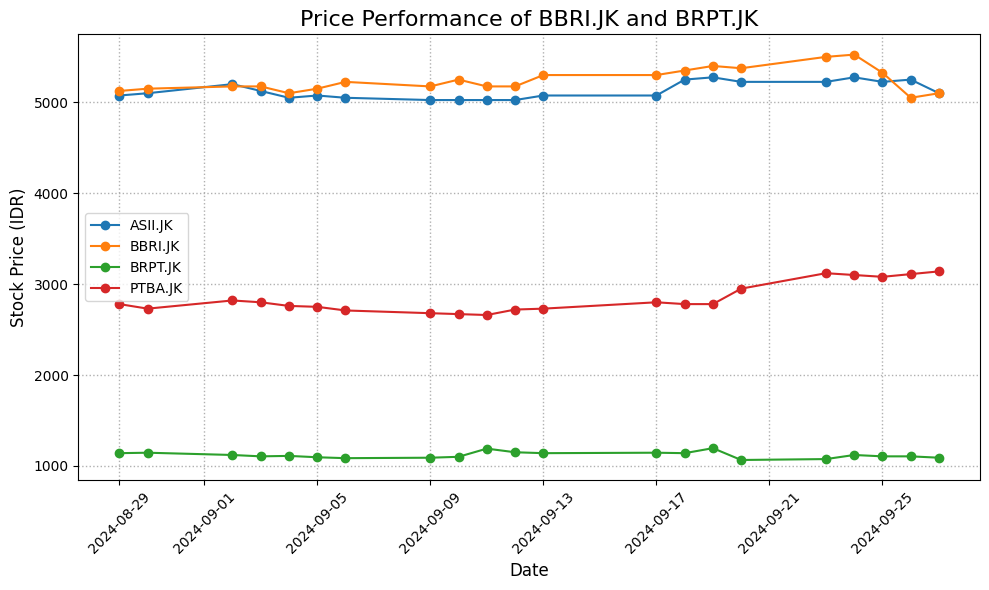

In [143]:
# Vizualize the movement of Indra's two stocks for the past 90 days
import matplotlib.pyplot as plt

# Plotting the prices
plt.figure(figsize=(10, 6))

# Plot ASII.JK stock prices
plt.plot(price_Siti.index, price_Siti['ASII.JK'], label='ASII.JK', marker='o')

# Plot BBRI.JK stock prices
plt.plot(price_Siti.index, price_Siti['BBRI.JK'], label='BBRI.JK', marker='o')

# Plot BRPT.JK stock prices
plt.plot(price_Siti.index, price_Siti['BRPT.JK'], label='BRPT.JK', marker='o')

# Plot PTBA.JK stock prices
plt.plot(price_Siti.index, price_Siti['PTBA.JK'], label='PTBA.JK', marker='o')

# Adding title and labels
plt.title('Price Performance of BBRI.JK and BRPT.JK', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Stock Price (IDR)', fontsize=12)

# Displaying a legend to distinguish between the four stocks
plt.legend()

# Adding grid for better readability
plt.grid(True, linestyle=':', linewidth=1)

# Display the plot
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Ensure everything fits well in the plot
plt.show()

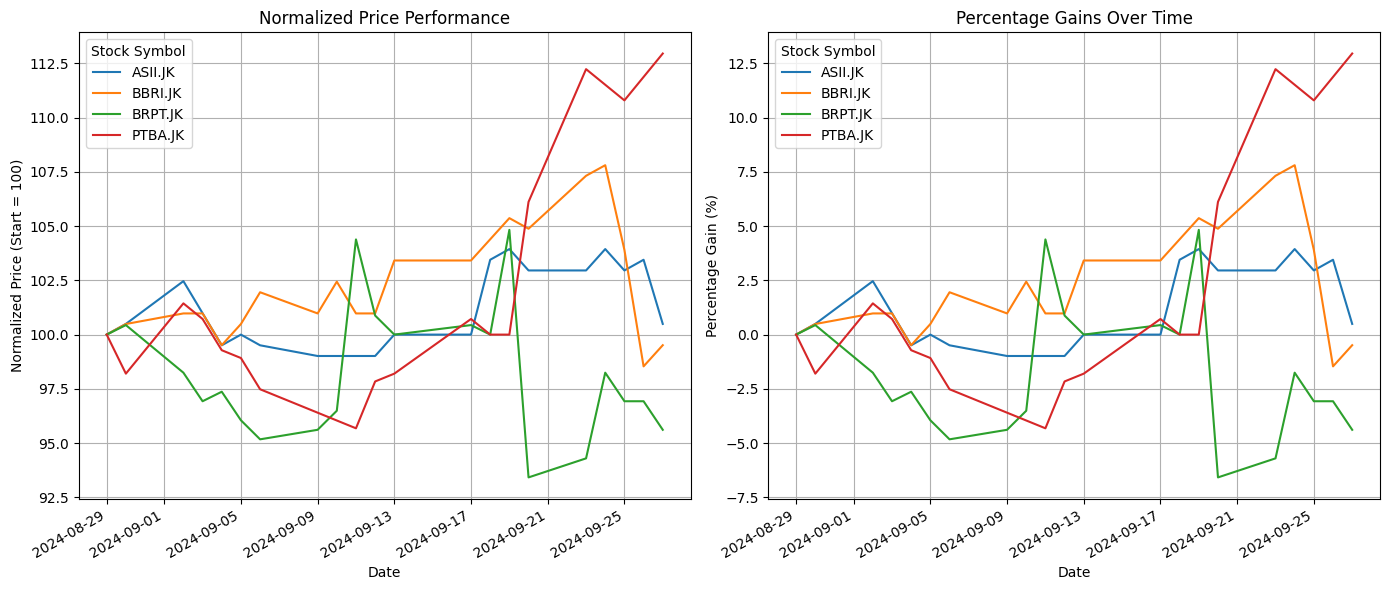

In [144]:
# Normalize prices to start from 100 for easy comparison
price_norm = price_Siti / price_Siti.iloc[0] * 100

# Calculate percentage gains from the initial price
price_gains = ((price_Siti - price_Siti.iloc[0]) / price_Siti.iloc[0]) * 100

# Plotting normalized prices and percentage gains
plt.figure(figsize=(14, 6))

# Plot normalized prices
plt.subplot(1, 2, 1)
price_norm.plot(ax=plt.gca(), title="Normalized Price Performance")
plt.ylabel('Normalized Price (Start = 100)')
plt.xlabel('Date')
plt.legend(title='Stock Symbol')
plt.grid(True)

# Plot percentage gains
plt.subplot(1, 2, 2)
price_gains.plot(ax=plt.gca(), title="Percentage Gains Over Time")
plt.ylabel('Percentage Gain (%)')
plt.xlabel('Date')
plt.legend(title='Stock Symbol')
plt.grid(True)

plt.tight_layout()
plt.show()


# MVO with Monte Carlos Simulation

## Theoretical Context

After understanding which stock to invest in, here are some key questions:

*   How much of each stock should we hold?
*   How to balance between risk and reward?

This is where Mean-Variance Optimization (MVO) comes in. It’s a method to help us find the optimal way to allocate our capital among various stocks - find the optimal weight.

**Step 1: Gather useful information**

What are the information we need?

1.	Expected Returns:
This is the average return you expect from each stock based on historical performance.


2.	Risk (Volatility):	Risk is measured as the variance (or more commonly, standard deviation) of the returns. It shows how much the stock’s returns fluctuate.

3.	Covariance Between Stocks: Covariance tells us how the returns of two stocks move together. Some stocks may go up and down at the same time (positive covariance), while others may move in opposite directions (negative covariance). Covariance helps us understand how diversification can reduce risk.

**Step 2: Build the Model**

Once we have this data, the next step is to use it to construct a portfolio of stocks. The goal of the model is twofold:

* Maximize Return: We want to achieve the highest possible return for a given amount of risk.
* Minimize Risk: Alternatively, we might want to minimize risk while achieving a certain return level.

Consult the mathematical model here: [link text](https://en.wikipedia.org/wiki/Modern_portfolio_theory)


**Step 3: Optimize the Portfolio through Sharp Ratio**

Now that the model is built, we can use it to optimize the portfolio. This means:

* Maximizing Return for a Given Level of Risk: This is suitable for investors who are willing to take on some risk but want to get the highest return for that risk level.

* Minimizing Risk for a Given Return: This is helpful for more conservative investors who want to reduce risk as much as possible while still achieving a certain return.

This optimization results will generate an Efficient Frontier:

A curve that shows the best possible portfolios in terms of risk and return. Every point on the frontier represents a portfolio that either minimizes risk for a given return or maximizes return for a given risk.

The highest sharp ratio point, which lies on the efficient frontier, gives the optimal portfolio weight.



**Bibliography**:

Useful math for Portfolio Optimization. [link](https://www.fields.utoronto.ca/programs/scientific/09-10/finance/courses/pliska3.pdf)

Understand basic concepts of mean (return), variance (risk) and how they work in investing. [link](https://smartasset.com/financial-advisor/mean-variance-optimization)

Understand Mean Variance Optimization Model. [link](https://analystprep.com/study-notes/cfa-level-iii/mean-variance-optimization-an-overview/)


## Mean & Variance
For this section, for a better illustration of the model, we will use **Siti_stocks**.

### Query the price info for the selected stocks

In [145]:
# Import all useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [146]:
# Randomly select 4 stocks from idxhidiv20
# idxhidiv20_tickers = df_pivot_history_idxhidiv20.columns.tolist()

selected_stocks = Siti_stocks
selected_stocks

['ASII.JK', 'BBRI.JK', 'BRPT.JK', 'PTBA.JK']

In [147]:
# Query the price info for the selected stocks
prices = df_pivot_history_idxhidiv20[selected_stocks]
prices.head()

,ASII.JK,BBRI.JK,BRPT.JK,PTBA.JK
date,,,,
2024-08-29,5075.0,5125.0,1140.0,2780.0
2024-08-30,5100.0,5150.0,1145.0,2730.0
2024-09-02,5200.0,5175.0,1120.0,2820.0
2024-09-03,5125.0,5175.0,1105.0,2800.0
2024-09-04,5050.0,5100.0,1110.0,2760.0


### Calculate Returns

In [148]:
# Calculate Returns
returns = pd.DataFrame()

for stock in prices:
  returns[stock + ' Returns'] = prices[stock].pct_change().dropna()

returns.head()

,ASII.JK Returns,BBRI.JK Returns,BRPT.JK Returns,PTBA.JK Returns
date,,,,
2024-08-30,0.004926,0.004878,0.004386,-0.017986
2024-09-02,0.019608,0.004854,-0.021834,0.032967
2024-09-03,-0.014423,0.000000,-0.013393,-0.007092
2024-09-04,-0.014634,-0.014493,0.004525,-0.014286
2024-09-05,0.004950,0.009804,-0.013514,-0.003623


### Calculate expected returns (mean) and covariance matrix
- Assuming 252 is the trading days in a year = 365 - weekends 104 - holidays 9
- We need to annualize the return and risk since MVO models are long-term orientated and long-term in economics perspectives refers to 12 months +

In [149]:
# Calculate expected returns (mean) and covariance matrix

expected_returns = (1 + returns.mean()) ** 252 - 1 # Annualize by multiplying by trading days
covariance_matrix = (1 + returns.cov()) ** 252 - 1 # Annualize covariance

# Print the expected returns and covariance matrix
print("Expected Returns:")
print(expected_returns)
print("\nCovariance Matrix:")
print(covariance_matrix)

Expected Returns:
ASII.JK Returns    0.086301
BBRI.JK Returns   -0.019847
BRPT.JK Returns   -0.331274
PTBA.JK Returns    3.924212
dtype: float64

Covariance Matrix:
                 ASII.JK Returns  BBRI.JK Returns  BRPT.JK Returns  \
ASII.JK Returns         0.045059         0.011561         0.021790   
BBRI.JK Returns         0.011561         0.089865        -0.000475   
BRPT.JK Returns         0.021790        -0.000475         0.398790   
PTBA.JK Returns        -0.001094         0.013658        -0.098856   

                 PTBA.JK Returns  
ASII.JK Returns        -0.001094  
BBRI.JK Returns         0.013658  
BRPT.JK Returns        -0.098856  
PTBA.JK Returns         0.138709  


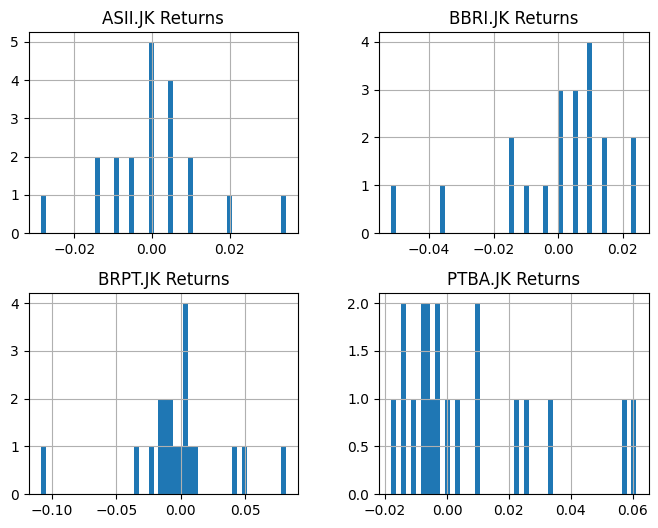

In [150]:
# Here we can see the distribution of each stock returns
returns.hist(figsize=(8,6), bins = 50)
plt.show()


## Monte Carlo Simulation

Monte Carlo simulation is a powerful technique used in portfolio optimization to assess the potential outcomes of different investment strategies or different allocations under varying conditions. It involves generating multiple scenarios based on statistical models and random sampling.

Implementing Monte Carlo simulation in Python involves combining statistical analysis, simulation, and optimization techniques to gain insights into portfolio performance under different allocations. For our analysis, we will run a simulation on different allocations of the same stocks to find the optimum allocation. A single run of the simulation is shown in the code below.

### Define Risk Free rate

In [151]:
# Define Risk Free rate
# Assume RF as 6,50% p.a. based on ST013T4 yield
# Source link https://www.djppr.kemenkeu.go.id/sukuktabungan
rf = 0.065

# Monte Carlo simulation
#Single Run
np.random.seed(101)
print(selected_stocks)

# Generates an array of random numbers representing initial weights for each asset in the portfolio
weights = np.array(np.random.random(4))
print('\nRandom Weights')
print(weights)

# Normalizing the randomly generated weights to ensure they sum up to 1, representing a fully invested portfolio.
print('\nRebalanced Weights')
weights = weights / np.sum(weights)
print(weights)

# Calculating the portfolio’s expected return using the weighted average of individual asset returns.
# It multiplies the annual mean returns of each asset by its respective weight and aggregates them.
print('\nPortfolio Return')
portfolio_return = np.sum(returns.mean()*252*weights)
print(portfolio_return)

# Expected Volatility (Standard Deviation): Using the formula for portfolio volatility, it calculates the square root of the dot product of weights, the covariance matrix of asset returns (multiplied by 252 for annualization), and weights transpose.
# The square root of covariance matrix is taken because square root of variance is standard deviation or volatility.
print('\nPortfolio Volatility')
portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov()*252, weights)))
print(portfolio_volatility)

# Sharpe Ratio measures the risk-adjusted return by subtracting the risk-free rate from the portfolio return and dividing by its volatility.
print('\nPortfolio Sharpe Ratio')
sharpe_ratio = (portfolio_return - rf) / portfolio_volatility
print(sharpe_ratio)

['ASII.JK', 'BBRI.JK', 'BRPT.JK', 'PTBA.JK']

Random Weights
[0.51639863 0.57066759 0.02847423 0.17152166]

Rebalanced Weights
[0.40122278 0.44338777 0.02212343 0.13326603]

Portfolio Return
0.22855640736690955

Portfolio Volatility
0.1783912283300854

Portfolio Sharpe Ratio
0.9168410851696907


### Simulation

Having seen a single run of the simulation above, let us now perform 5000 simulations of the random allocations generated to find the optimum allocation for the four stocks chosen. The portfolio performance will analyzed based on the Sharpe ratio. The Sharpe ratio gives the return delivered per unit of risk taken. The code for the simulation is shown below.

In [152]:
# Specify the number of simulated portfolios to generate (in our case, 5000)
num_ports = 5000

# A 2D array to store the randomly generated weights for each asset in each portfolio.
all_weights = np.zeros((num_ports, len(selected_stocks)))

# Create arrays to store portfolio returns, volatilities, and Sharpe ratios for each simulated portfolio.
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharp_arr = np.zeros(num_ports)

# Looping over each portfolio
for i in range(num_ports):

  # Generate random weights randomly assigning weights to each asset in the portfolio and rebalancing them to sum up to 1
  weights = np.array(np.random.random(4))
  weights = weights / np.sum(weights)
  all_weights[i, :] = weights

  #Expected return
  ret_arr[i] = np.sum(((( 1 + returns.mean()) ** 252 - 1 ) * weights))

  #Expected volatility
  vol_arr[i] = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))

  #Sharpe ratio
  sharp_arr[i] = (ret_arr[i] - rf) / vol_arr[i]

## Sharpe Ratio

Sharpe ratio measures the risk-adjusted return by subtracting the risk-free rate. We want the portfolio weight randomly generated by Monte Carlo Simulation with the highest sharp ratio.

More info [link text](https://www.investopedia.com/terms/s/sharperatio.asp)

In [153]:
# Retrieve the maximum value from the sharp_arr array
max_sr = sharp_arr.max()

# Find the index of the portfolio with the maximum Sharpe ratio in the sharp_arr array.
max_sr_index = sharp_arr.argmax()

# Retrieve the weights of the assets in the portfolio corresponding to the index 4091 in the all_weights array.
opt_weights = all_weights[max_sr_index,:]

# Retrive the optimal expected returns and volaticity
optimal_return = ret_arr[max_sr_index]
optimal_volatility = vol_arr[max_sr_index]

# Print Result
print('Max Sharpe Ratio: ', max_sr)
print('Optimal Return: ', optimal_return)
print('Optimal Volatility: ', optimal_volatility)
print('Optimal Weights: ', opt_weights)
print('Stock List: ', selected_stocks)


Max Sharpe Ratio:  11.816182411859891
Optimal Return:  2.7913365067744493
Optimal Volatility:  0.23072904697527588
Optimal Weights:  [0.01436917 0.04716609 0.20954182 0.72892292]
Stock List:  ['ASII.JK', 'BBRI.JK', 'BRPT.JK', 'PTBA.JK']


## Efficient Frontier

The efficient frontier rates portfolios on a  coordinate plane. Plotted on the x-axis is the risk, while return is plotted on the y-axis—annualized standard deviation is typically used to measure risk, while compound annual growth rate (CAGR) is used for return.

More info [link](https://www.investopedia.com/terms/e/efficientfrontier.asp)

The volatility, return and sharpe ratio values for the simulation are plotted below.

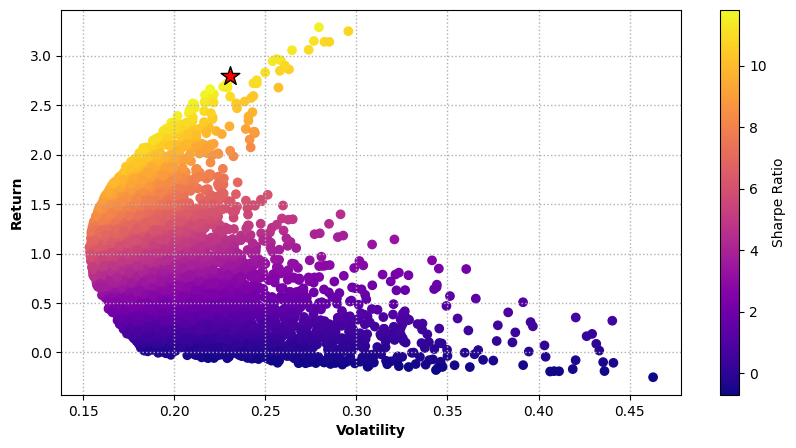

In [154]:
plt.figure(figsize = (10,5))
plt.scatter(vol_arr, ret_arr, c = sharp_arr, cmap = 'plasma')
plt.colorbar(label = 'Sharpe Ratio')
plt.xlabel('Volatility', fontweight = 'bold')
plt.ylabel('Return', fontweight = 'bold')

plt.scatter(optimal_volatility, optimal_return, c='red', s=200, edgecolors='black', marker='*')
plt.grid(True, ls=':', lw=1)


The visualization can be seen above for volatility, return and sharpe ratio. The x-axis shows the volatility, y axis shows the return and the colorbar on right shows the sharpe ratio graded colorwise with dark color showing the lowest and light values showing the highest sharpe ratio. The red star shows the highest Sharpe ratio point on the plot.

# MVO with Scipy Minimized Function

## Overview

In our next analysis method, we will optimize the same portfolio allocation mathematically using the minimize function in Scipy (a library in Python) and Sharpe ratio.

Portfolio optimization using Scipy’s minimize function and the Sharpe ratio involves using mathematical optimization to find the optimal asset allocation that maximizes the Sharpe ratio—a measure of risk-adjusted returns.

The basic principle is to find the Sharpe ratio for a random allocation and then multiply it by -1 to make it negative and then minimize it to obtain the allocation weights that gives the highest Sharpe ratio.

In [155]:
def ret_vol_sr(weights):
  weights = np.array(weights)

  # Calculate Annualized Expected Returns
  ret = np.sum(( 1 + returns.mean() * weights) ** 252 - 1)

  # Calculate Portfolio Volaticity
  vol = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))

  # Calculate Sharp Ratio, Rist Free rate 6.4%
  sr = (ret - rf) / vol

  return np.array([ret, vol, sr])

## Scipy Minimize Function

In [156]:

from scipy.optimize import minimize

# This function below is designed to negate the Sharpe ratio because in optimization, the objective function is minimized by default.
# We want to maximize the Sharpe ratio, index 2, so multiplying by -1 helps flip the optimization to achieve that.
def sharp_neg(weights):
  return ret_vol_sr(weights)[2] * -1

# constraint function ensures the weight sum is 1
# In optimization, constraints are typically written such that the result equals 0
# If the sum of weights is exactly 1, then np.sum(weights) - 1 will equal 0. This satisfies the constraint that the sum of the weights must be 1.
def sum_check(weights):
  return np.sum(weights) - 1

# We want equity constraint, the function must return a value equals to 0
# Specify the equality constraint that the sum of weights must equal 1.
cons = ({'type': 'eq', 'fun': sum_check})

# Ensure that each weight lies between 0 and 1, meaning no short-selling or leverage.
bounds = ((0, 1), (0, 1), (0, 1), (0, 1))

# Initial guess for the optimization equal weighting of 25% for each stock initially.
init_guess = [0.25, 0.25, 0.25, 0.25]

# SLSQP stands for Sequential Least Squares Quadratic Programming, which is an algorithm that can handle both equality and inequality constraints, making it well-suited for portfolio optimization problems.
# We are minimize the negative sharp ratio - maximize sharp ratio

opt_results = minimize(sharp_neg, init_guess, method = 'SLSQP', bounds = bounds, constraints = cons)

opt_results


 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -10.706476741455216
       x: [ 0.000e+00  0.000e+00  0.000e+00  1.000e+00]
     nit: 2
     jac: [-3.199e-01  1.173e+00 -7.460e+00 -1.100e+01]
    nfev: 10
    njev: 2

- fun —> Returns the result for the negative sharpe ratio 
- x —> Represents the optimizal weights in accordance with the stock list order
- nit —> This value indicates the number of iterations that the optimization algorithm took to converge to the optimal solution. A smaller number usually means a faster convergence 
- jac —> Jacobian (or gradient) of the objective function at the optimal weights

In [157]:
# opt_results.x gives the optimized portfolio weights.
opt_results.x

array([0., 0., 0., 1.])

In [158]:
# Print Result
print('Return: ', ret_vol_sr(opt_results.x)[0])
print('Volatility: ', ret_vol_sr(opt_results.x)[1])
print('Sharpe Ratio: ', ret_vol_sr(opt_results.x)[2])
print (selected_stocks)
print ('Optimal Weights: ', opt_results.x)


Return:  3.9242124031284966
Volatility:  0.3604558713685634
Sharpe Ratio:  10.706476741455216
['ASII.JK', 'BBRI.JK', 'BRPT.JK', 'PTBA.JK']
Optimal Weights:  [0. 0. 0. 1.]


## Result Comparison

In [159]:
# Print Result from Monte Carlos Simulation
print ('\nResult from Monte Carlos Simulation')
print('Stock List: ', selected_stocks)
print('Optimal Weights: ', opt_weights)
print('Optimal Return: ', optimal_return)
print('Optimal Volatility: ', optimal_volatility)
print('Max Sharpe Ratio: ', max_sr)

# Print Result from Scipy Minimized Function
print ('\nResult from Scipy Minimized Function')
print ('Stock List: ', selected_stocks)
print ('Optimal Weights: ', opt_results.x)
print('Return: ', ret_vol_sr(opt_results.x)[0])
print('Volatility: ', ret_vol_sr(opt_results.x)[1])
print('Sharpe Ratio: ', ret_vol_sr(opt_results.x)[2])



Result from Monte Carlos Simulation
Stock List:  ['ASII.JK', 'BBRI.JK', 'BRPT.JK', 'PTBA.JK']
Optimal Weights:  [0.01436917 0.04716609 0.20954182 0.72892292]
Optimal Return:  2.7913365067744493
Optimal Volatility:  0.23072904697527588
Max Sharpe Ratio:  11.816182411859891

Result from Scipy Minimized Function
Stock List:  ['ASII.JK', 'BBRI.JK', 'BRPT.JK', 'PTBA.JK']
Optimal Weights:  [0. 0. 0. 1.]
Return:  3.9242124031284966
Volatility:  0.3604558713685634
Sharpe Ratio:  10.706476741455216


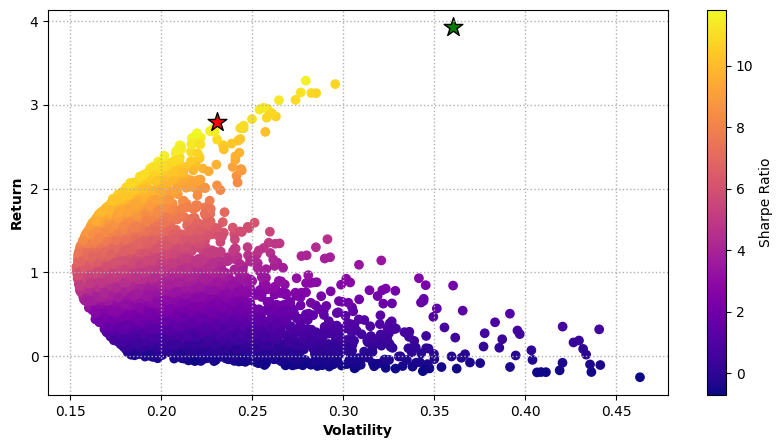

In [160]:
# Draw Efficient Frontier

plt.figure(figsize = (10,5))
plt.scatter(vol_arr, ret_arr, c = sharp_arr, cmap = 'plasma')
plt.colorbar(label = 'Sharpe Ratio')
plt.xlabel('Volatility', fontweight = 'bold')
plt.ylabel('Return', fontweight = 'bold')

# Optimial point for Monte Carlos Simulation is labelled as red star
plt.scatter(optimal_volatility, optimal_return, c='red', s=200, edgecolors='black', marker='*')
plt.grid(True, ls=':', lw=1)

# Optimial point for Scipy Optimization is labelled as green star
plt.scatter(ret_vol_sr(opt_results.x)[1], ret_vol_sr(opt_results.x)[0], c='green', s=200, edgecolors='black', marker='*')

## Summary

The Monte Carlo Simulation provides a diversified portfolio with a balanced approach to risk and return, while the Scipy Optimization approach is more aggressive, concentrating investments in fewer stocks with higher expected returns but also slightly increased volatility.

Overall, the Scipy optimization yields better risk-adjusted returns (higher Sharpe ratio) and expected returns, making it a more favorable strategy in this context. However, the Monte Carlo simulation’s results reflect a more cautious approach to diversification that may suit risk-averse investors.

# Summaries and Recommendations

## Workshop Summary

This workshop explored key concepts in portfolio optimization, focusing on sector analysis, stock selection methodologies, and mean-variance optimization (MVO). The main topics included:

* Understanding Sectors and Stock Indices: Selecting stock indices based on business objectives and industry trends using SectorsAPI.
Data Collection and Exploration: Retrieving stock data from APIs and performing exploratory data analysis (EDA) to identify trends and outliers.
* Stock Selection via Diversification Strategy: Applying EDA and normalization techniques to score companies on growth potential, dividends, and financial indicators.
* Mean-Variance Optimization (MVO): Implementing portfolio optimization through Monte Carlo simulations and the Scipy minimized function to maximize returns for a given risk level.

Stock Index Selection

In this workshop, we focused on Indra’s case using a single stock index. In practice, building a robust portfolio involves selecting stocks from multiple indices, enhancing diversification across companies, regions, asset classes, and sectors to reduce risk and improve stability. Considerations include global market trends, macroeconomic conditions, and sector performance.

Stock Analysis and Selection

We employed a diversification strategy by normalizing the dataset and scoring companies based on key metrics. In real applications, the analysis would be more complex, incorporating:

* Macroeconomic Conditions: Factors like interest rates and inflation can significantly impact stock performance.
* Valuation Metrics: Evaluating P/E ratios, price-to-book, and free cash flow yield is critical for assessing valuations.
* Risk Factors: Systemic and geopolitical risks should be considered.
* Sustainability and ESG Factors: Institutional investors increasingly prioritize environmental, social, and governance criteria for long-term growth.

Mean-Variance Optimization

Two approaches to MVO were applied:

* Monte Carlo Simulation: This method generates thousands of random portfolios to visualize the efficient frontier and calculate the Sharpe ratio. While flexible, it can be computationally expensive and may not converge on the most efficient portfolios.
* Scipy Minimized Function: This deterministic method computes the optimal portfolio by minimizing volatility or maximizing the Sharpe ratio under specific constraints. It is faster but may be limited by initial guesses for weights and a narrower exploration of possibilities.

Limitations of Both Approaches:

Monte Carlo Limitations: Results depend on iterations, and high computational costs can limit efficiency. Historical returns may not capture future volatility or correlation shifts.

Scipy Optimization Limitations: Sensitivity to initial conditions may lead to local minima, and the assumption of normal return distribution may not hold during extreme market events.

To enhance analysis, consider:

* Dynamic Risk Modeling: Adjusting risk models for changing correlations and volatilities.
* Transaction Costs and Liquidity Constraints: Factoring in trading costs and asset liquidity in optimization models.
* Non-Normal Return Distributions: Accounting for tail risk and skewness in return distributions.

